In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

import datetime
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['axes.facecolor'] = 'dimgrey'
#plt.rcParams['axes.facecolor'] = 'black'

In [2]:
def DataFilter(df1):
    df = df1.copy(deep=True)
    df['Vic'] = np.NAN
    df['GF'] = np.NAN
    df['GA'] = np.NAN
    df['GD'] = np.NAN
    df['ExpGf'] = np.NAN
    df['ExpGa'] = np.NAN
    df['ExpGd'] = np.NAN
    df['ExpPPM'] = np.NAN
    df['ExpRate'] = np.NAN
    for i in xrange(len(df)):
        tmp = df.score[i]
        if tmp[2] == ":":
            print tmp
            tmp = "4:2"
        #chapter_2.GF[i] = int(tmp[0])
        df.loc[i, 'GF'] = int(tmp[0])
        df.loc[i, 'GA'] = int(tmp[2])
        df.loc[i, 'GD'] = int(tmp[0]) - int(tmp[2])
        df.loc[i, 'Vic'] = float((tmp[0] > tmp[2]))
#     df['ExpGf'] = df.GF.cumsum()
#     df['ExpGa'] = df.GA.cumsum()
#     df['ExpGd'] = df.GD.cumsum()
#     df['ExpPPM'] = df.points.cumsum()
#     df['ExpRate'] = df.Vic.cumsum()
#     for i in xrange(len(df)):
#         df.loc[i, 'ExpGf'] = df['ExpGf'][i] / (i+1)
#         df.loc[i, 'ExpGa'] = df['ExpGa'][i] / (i+1)
#         df.loc[i, 'ExpGd'] = df['ExpGd'][i] / (i+1)
#         df.loc[i, 'ExpPPM'] = df['ExpPPM'][i] / (i+1)
#         df.loc[i, 'ExpRate'] = df['ExpRate'][i] / (i+1)

    return df

In [3]:
def load_data(df_list):
    print "start",
    df = pd.concat(df_list, ignore_index=True)
    df.date = pd.to_datetime(df.date, dayfirst=True)
    df = df.sort_values(by='date')
    mask = df.match_type.str.startswith('Bundesliga', na=False)
    df = df.loc[mask]
    df = df.reset_index(drop=True)
    df = DataFilter(df)
    print "end"
    return df

In [4]:
start_1 = pd.to_datetime('5/1/1996') #Wenger In
start_2 = pd.to_datetime('6/1/2003') #阿布
start_3 = pd.to_datetime('7/1/2004') #Big4 starts
start_4 = pd.to_datetime('9/1/2008') #Abu Dhabi
end_1 = pd.to_datetime('5/1/2009') # Big4 ends
end_2 = pd.to_datetime('12/17/2015')

In [6]:
teams = ["bayern-muenchen", "borussia-dortmund", "vfb-stuttgart", "vfl-wolfsburg",
        "werder-bremen", "bayer-leverkusen", "fc-schalke-04", "hamburger-sv"]

dfs =[[], [], [], [], [], [], [], []]

pre = './data/'

for i in range(8):
    for j in range(22):
        add = pre+teams[i]+'/'+teams[i]+'_'+str(1996+j)+'_'+str(1997+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs[i].append(df_cache)

teams_data = [load_data(dfs[i]) for i in range(8)]
print len(teams_data[0]), len(teams_data[1]), len(teams_data[2])

 start end
start end
start end
start end
start end
start end
start end
start end
748 748 714


In [8]:
metrics = [[], [], [], [], [], [], [], []]

for i in range(8):
    metrics[i].append(teams_data[i].points.cumsum())
    metrics[i].append(teams_data[i].GF.cumsum())
    metrics[i].append(teams_data[i].GA.cumsum())

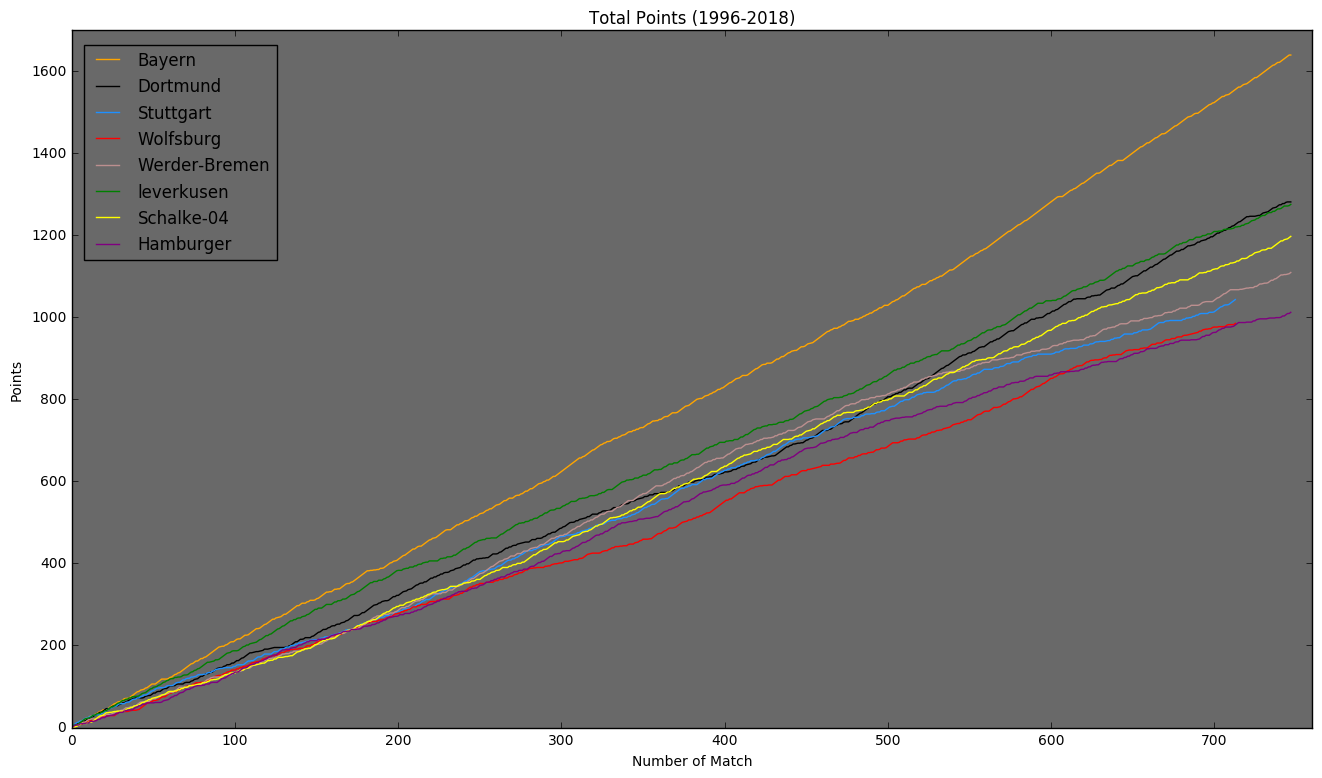

In [13]:
plt.rcParams["figure.figsize"] = [16,9]
colors = ['orange', 'k', 'dodgerblue', 'red', 'rosybrown', 'green', 'yellow', 'purple']
for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

plt.xlim([0,760])
plt.ylim([0, 1700])
plt.title('Total Points (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.67))
plt.show()


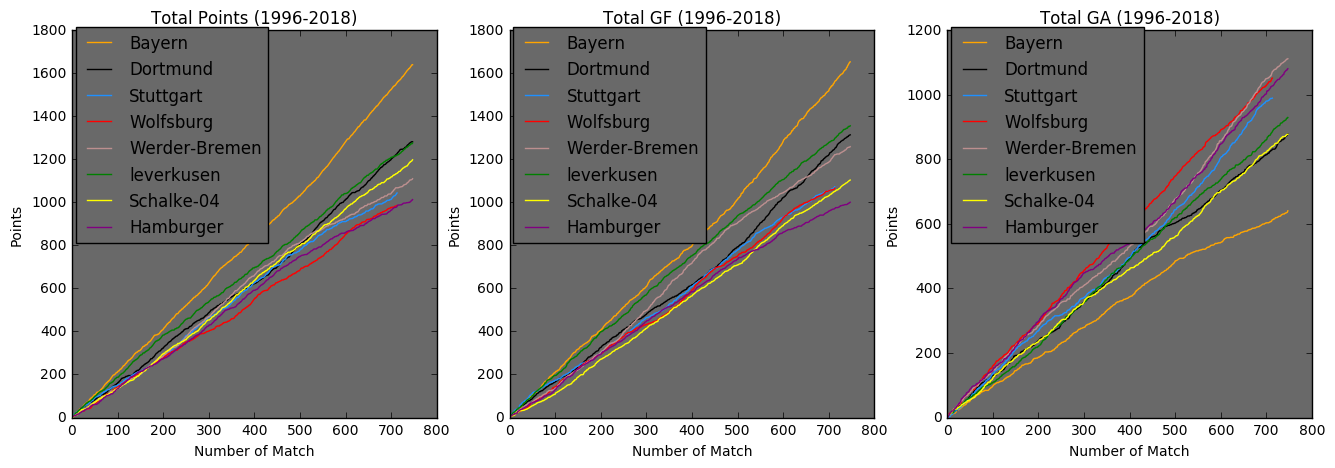

In [14]:
plt.rcParams["figure.figsize"] = [16,5]

colors = ['orange', 'k', 'dodgerblue', 'red', 'rosybrown', 'green', 'yellow', 'purple']



plt.subplot(131)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

#plt.xlim([0,320])
plt.title('Total Points (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(132)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][1], color=colors[i])

#plt.xlim([0,320])
plt.title('Total GF (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(133)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][2], color=colors[i])

#plt.xlim([0,320])
plt.title('Total GA (1996-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))

plt.show()

In [20]:
teams = ["bayern-muenchen", "borussia-dortmund", "vfb-stuttgart", "vfl-wolfsburg",
        "werder-bremen", "bayer-leverkusen", "fc-schalke-04", "hamburger-sv"]

dfs =[[], [], [], [], [], [], [], []]

pre = './data/'

for i in range(8):
    for j in range(8):
        add = pre+teams[i]+'/'+teams[i]+'_'+str(1996+j)+'_'+str(1997+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs[i].append(df_cache)

teams_data = [load_data(dfs[i]) for i in range(8)]
print len(teams_data[0]), len(teams_data[1]), len(teams_data[2])

start end
start end
start end
start end
start end
start end
start end
start end
272 272 272


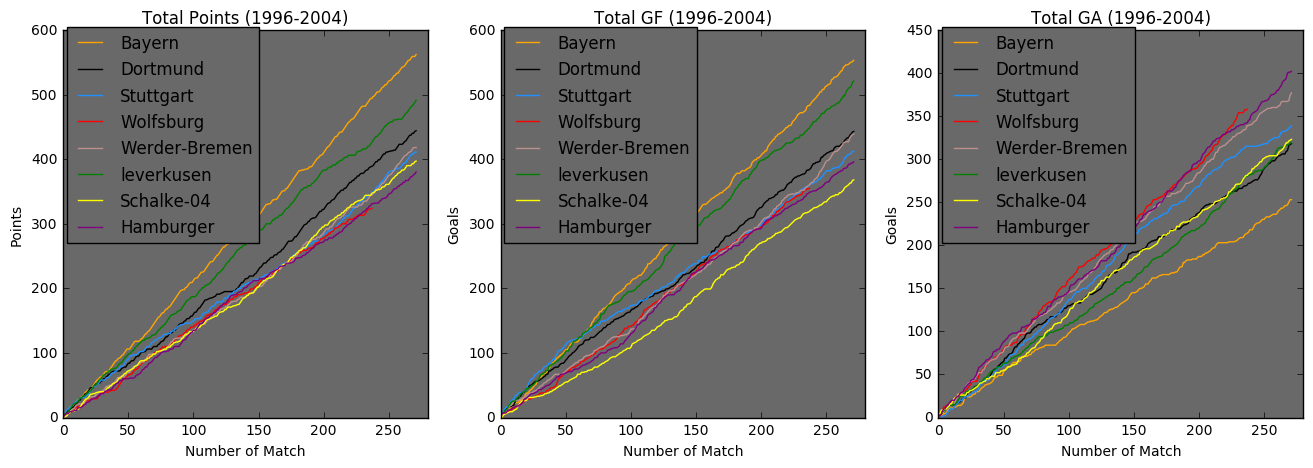

In [21]:
plt.rcParams["figure.figsize"] = [16,5]
metrics = [[], [], [], [], [], [], [], []]

for i in range(8):
    metrics[i].append(teams_data[i].points.cumsum())
    metrics[i].append(teams_data[i].GF.cumsum())
    metrics[i].append(teams_data[i].GA.cumsum())
    
colors = ['orange', 'k', 'dodgerblue', 'red', 'rosybrown', 'green', 'yellow', 'purple']



plt.subplot(131)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

plt.xlim([0,280])
plt.title('Total Points (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(132)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][1], color=colors[i])

plt.xlim([0,280])
plt.title('Total GF (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(133)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][2], color=colors[i])

plt.xlim([0,280])
plt.title('Total GA (1996-2004)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))

plt.show()

In [24]:
teams = ["bayern-muenchen", "borussia-dortmund", "vfb-stuttgart", "vfl-wolfsburg",
        "werder-bremen", "bayer-leverkusen", "fc-schalke-04", "hamburger-sv"]

dfs =[[], [], [], [], [], [], [], []]

pre = './data/'

for i in range(8):
    for j in range(5):
        add = pre+teams[i]+'/'+teams[i]+'_'+str(2004+j)+'_'+str(2005+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs[i].append(df_cache)

teams_data = [load_data(dfs[i]) for i in range(8)]
print len(teams_data[0]), len(teams_data[1]), len(teams_data[2])

start end
start end
start end
start end
start end
start end
start end
start end
170 170 170


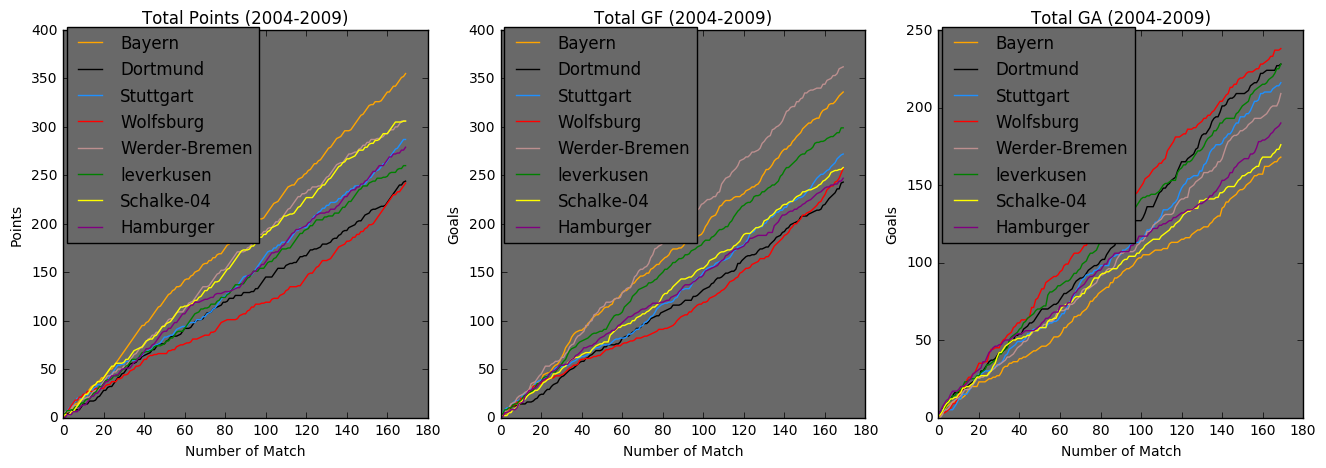

In [25]:
plt.rcParams["figure.figsize"] = [16,5]
metrics = [[], [], [], [], [], [], [], []]

for i in range(8):
    metrics[i].append(teams_data[i].points.cumsum())
    metrics[i].append(teams_data[i].GF.cumsum())
    metrics[i].append(teams_data[i].GA.cumsum())
    
colors = ['orange', 'k', 'dodgerblue', 'red', 'rosybrown', 'green', 'yellow', 'purple']



plt.subplot(131)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

plt.xlim([0,180])
plt.title('Total Points (2004-2009)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(132)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][1], color=colors[i])

plt.xlim([0,180])
plt.title('Total GF (2004-2009)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(133)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][2], color=colors[i])

plt.xlim([0,180])
plt.title('Total GA (2004-2009)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))

plt.show()

In [26]:
teams = ["bayern-muenchen", "borussia-dortmund", "vfb-stuttgart", "vfl-wolfsburg",
        "werder-bremen", "bayer-leverkusen", "fc-schalke-04", "hamburger-sv"]

dfs =[[], [], [], [], [], [], [], []]

pre = './data/'

for i in range(8):
    for j in range(9):
        add = pre+teams[i]+'/'+teams[i]+'_'+str(2009+j)+'_'+str(2010+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs[i].append(df_cache)

teams_data = [load_data(dfs[i]) for i in range(8)]
print len(teams_data[0]), len(teams_data[1]), len(teams_data[2])

start end
start end
start end
start end
start end
start end
start end
start end
306 306 272


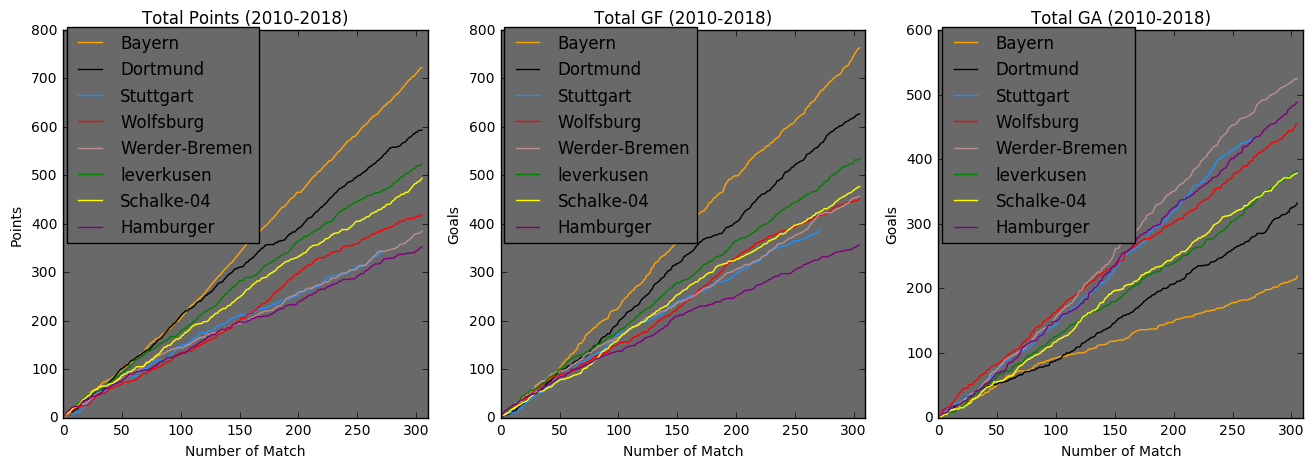

In [27]:
plt.rcParams["figure.figsize"] = [16,5]
metrics = [[], [], [], [], [], [], [], []]

for i in range(8):
    metrics[i].append(teams_data[i].points.cumsum())
    metrics[i].append(teams_data[i].GF.cumsum())
    metrics[i].append(teams_data[i].GA.cumsum())
    
colors = ['orange', 'k', 'dodgerblue', 'red', 'rosybrown', 'green', 'yellow', 'purple']



plt.subplot(131)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][0], color=colors[i])

plt.xlim([0,310])
plt.title('Total Points (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(132)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][1], color=colors[i])

plt.xlim([0,310])
plt.title('Total GF (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))
plt.subplot(133)

for i in range(8):
    plt.plot(teams_data[i].index, metrics[i][2], color=colors[i])

plt.xlim([0,310])
plt.title('Total GA (2010-2018)', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.45))

plt.show()